# Lab 3

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

## 3(a)

In [36]:
# define jones matrices for common optical devices

#jones horizontal polarizer
def jones_hpolarizer():
    return [[1,0],[0,0]]

#jones vertical polarizer
def jones_vpolarizer():
    return [[0,0],[0,1]]

#jones for a general waveplate
def jones_waveplate(delta):
    return [[1,0],[0,np.exp(-1j*delta)]]

#jones half wave plate
def jones_hwp():
    return jones_waveplate(np.pi)

#jones quarter wave plate
def jones_qwp():
    return jones_waveplate(np.pi/2)

def jones_plane_mirror():
    return [[-1j,0],[0,-1j]]

#rotation matrix in 2-D
def rotate_matrix(theta):
    return [[np.cos(theta), -1*np.sin(theta)],[np.sin(theta), np.cos(theta)]]

#roated jones matrix for any optical component
def rotate_jones(jones_matrix:list, theta):
    _array = np.array(rotate_matrix(theta)) @ np.array(jones_matrix) @ np.array(rotate_matrix(-1*theta))
    return _array.tolist()



### 1)

Text(0.5, 1.0, 'plot of middle polarizer angle vs output horizontal polarized beam power')

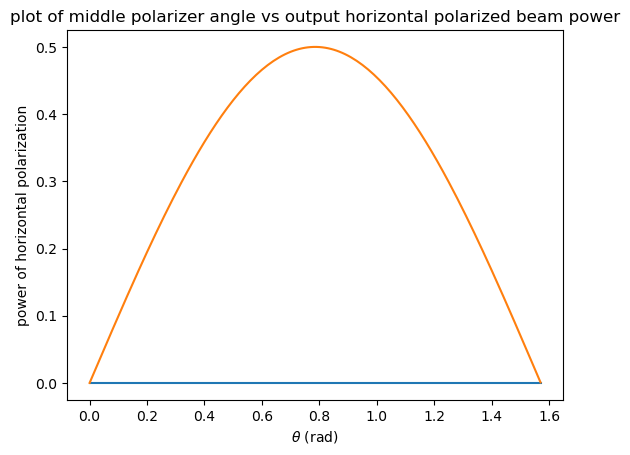

In [11]:
def function_cross_polarizer(input_vector:list, theta):
    return (np.array(jones_vpolarizer()) @ np.array(rotate_jones(jones_hpolarizer(),theta)) @ np.array(jones_hpolarizer()) @ np.array(input_vector)).tolist()

theta_range = np.arange(0, np.pi/2, 0.01)

horizontal_polarization_power = []

start_vector = [1,0]

for _theta in theta_range:
    horizontal_polarization_power.append(np.float64(function_cross_polarizer(start_vector, _theta)))

plt.plot(theta_range,horizontal_polarization_power)

plt.xlabel("$\\theta$ (rad)")
plt.ylabel("power of horizontal polarization")
plt.title("plot of output horizontal polarized beam power vs middle polarizer angle")

### 2)

Modelling PBS as a horizontal beam splitter

Text(0.5, 1.0, 'plot of output horizontal polarized beam power vs angle of QWP')

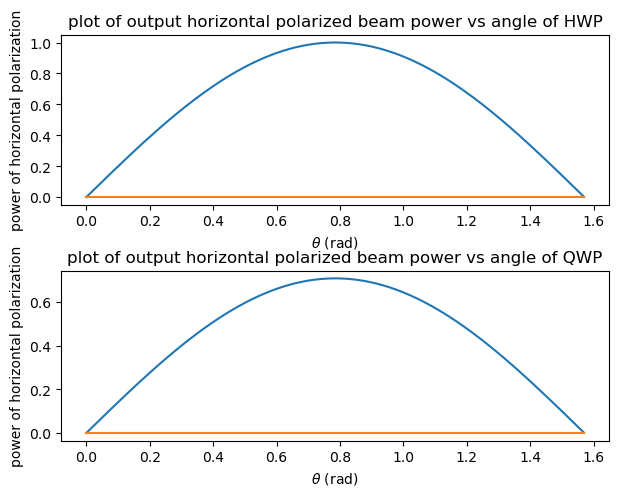

In [34]:
def function_hwp(input_vector:list, theta):
    return (np.array(jones_hpolarizer()) @ np.array(rotate_jones(jones_hwp(),theta))  @ np.array(input_vector)).tolist()

def function_qwp(input_vector:list, theta):
    return (np.array(jones_hpolarizer()) @ np.array(rotate_jones(jones_qwp(),theta))  @ np.array(input_vector)).tolist()

theta_range = np.arange(0, np.pi/2, 0.01)

horizontal_polarization_power_hwp = []
horizontal_polarization_power_qwp = []

start_vector = [0,1]

for _theta in theta_range:
    horizontal_polarization_power_hwp.append(np.float64(np.abs(function_hwp(start_vector, _theta))))
    horizontal_polarization_power_qwp.append(np.float64(np.abs(function_qwp(start_vector, _theta))))

fig, ax = plt.subplots(2, 1)

#ax[0] = plt.subplot(2,1,1)
ax[0].plot(theta_range,horizontal_polarization_power_hwp)

ax[0].set_xlabel("$\\theta$ (rad)")
ax[0].set_ylabel("power of horizontal polarization")
ax[0].set_title("plot of output horizontal polarized beam power vs angle of HWP")
fig.tight_layout()

#plt2 = plt.subplot(2,1,2)
ax[1].plot(theta_range,horizontal_polarization_power_qwp)


ax[1].set_xlabel("$\\theta$ (rad)")
ax[1].set_ylabel("power of horizontal polarization")
ax[1].set_title("plot of output horizontal polarized beam power vs angle of QWP")

#def func_theta(theta):
#    return np.abs((1 + 1j)*np.sin(theta)*np.cos(theta))
#
#ax[2].plot(theta_range,func_theta(theta_range))

### 4)

In [66]:
def function_isolator(delta):
    _array = np.array(jones_hpolarizer()) @ np.array(rotate_jones(jones_waveplate(np.pi/2 + delta), np.pi/4))    @   np.array(jones_plane_mirror()) @ np.array(rotate_jones(jones_waveplate(np.pi/2 + delta), np.pi/4))
    return _array.tolist()

input_vector = np.array([[1,0]]).transpose()
print("input vector is: \n")
print(input_vector)

output_vector_1 = np.array(function_isolator(0)) @ input_vector
output_vector_2 = np.array(function_isolator(0.05)) @ input_vector
print("\n\noutput vector at delta = 0 is :")
print(output_vector_1.round(4))

print("\n\noutput vector at delta = 0.05 is :")
print(output_vector_2.round(4))


input vector is: 

[[1]
 [0]]


output vector at delta = 0 is :
[[-0.-0.j]
 [ 0.+0.j]]


output vector at delta = 0.05 is :
[[0.0499-0.0025j]
 [0.    +0.j    ]]


### 5)

In [70]:
def jones_arbitrary_polarization(r,phi):
    _theta = 0.5 * np.arctan(r)
    _array = np.array(rotate_jones(jones_qwp(), phi)) @ np.array(rotate_jones(jones_hwp(), _theta + phi/2))

    return _array



In [71]:
# test run

print(jones_arbitrary_polarization(0.25,np.pi/4))

[[0.68599434+0.17149859j 0.17149859-0.68599434j]
 [0.68599434-0.17149859j 0.17149859+0.68599434j]]
